In [193]:
import os
import cv2
import numpy as np
import matplotlib
from matplotlib import image
import matplotlib.pyplot as plt
import math

img_rgb = np.load("mini_data/images_rgb.npy")
img_gray = np.load("mini_data/images_gray.npy")
img_rgb_sum = np.load("mini_data/images_rgbsum.npy")

#print(np.shape(img_rgb[228][0]))

def calcSqDistances(X,Kmus):
  N = np.shape(X)[0]
  K = np.shape(Kmus)[0]
  dist_array = np.zeros((N,K), dtype = np.float64)
  for i in range(N):
   for j in range(K):
    dist_array[i,j] = np.linalg.norm(X[i] - Kmus[j])
  return dist_array
  #return((-2 * X @ Kmus.T + np.sum(Kmus * Kmus, axis = 1).T).T + np.sum(X * X, axis = 1)).T

def determineRnk(sqDmat):
  low = np.argmin(sqDmat, axis = 1)
  rnk = np.identity(sqDmat.shape[1])[low]
  return rnk

def recalcMus(X, Rnk):
    Kmus = np.zeros((len(Rnk[0]), 2))
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk, axis=0))).T

def runKMeans(K):
    X = img_rgb
    N = np.shape(X)[0]
    D = np.shape(X)[1]

    Kmus = np.zeros((K,D))

    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]
    

    for itr in range(1000):
        distmat = calcSqDistances(X, Kmus)

        rnk = determineRnk(distmat)

        mus_old = Kmus
        Kmus = recalcMus(X, rnk)
        if np.sum(np.abs(mus_old.reshape((-1,1)) - Kmus.reshape((-1,1)))) < 1e-6:
            break

    return Kmus

def get_cluster_plot(Kmus, rows = 2): 
    '''
    : get a plot of what different clusters represent
    : takes as input the cluster location matrix
    '''
    fig,axs = plt.subplots(rows,5, figsize = (15,9))
    for i in range(len(Kmus)):
        cluster = Kmus[i].reshape(-1,768) * 768
        axs[i//5][i%5].imshow(cluster, cmap = plt.cm.binary)
        axs[i//5][i%5].set_title(f'Cluster {i + 1}')


(256, 256, 3)


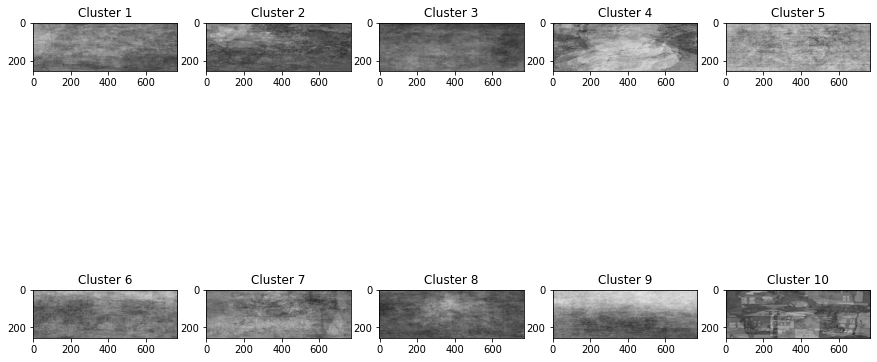

In [194]:
test = runKMeans(10)
print(np.shape(test[5]))
get_cluster_plot(test)